# CS 698 Quantum Computing - Final Project Submission

>*New Jersey Institute Of Technology* - **Fall 2020**<br>
>>**Members of Group**: 
>>> \- Sai Akhilesh Chunduri (sc2344)<br> \- Jasmin Patel (jp878)<br> 

# Introduction



### Quantum Algorithms

Quantum computers utilize the unique characteristics of the quantum systems to process exponentially large amount of data
in a very short time. Obviously this kind of computing power has the potential application in mathematics, cryptography, and
also in the simulation of quantum systems themselves. A fundamental feature of many of these algorithms is that they allow a
quantum computer to evaluate a function f (x) for many different values of x simultaneously.

#### There are 4 fundamental Algorithms in Quantum Computing :

* **Deutsch’s Algorithm**
* **Deutsch – Jozsa Algorithm**
* **Grover’s Search Algorithm**
* **Shor’s Factoring Algorithm**

In this project we will take two algorithms namely **Deutsch – Jozsa Algorithm, Grover’s Search Algorithm**, and we will do an in depth mathematical analysis of it and at last we will implement the above 2 algorithms using Qiskit.

### Grover’s Search Algorithm --- *Introduction*

* Grover’s algorithm performs a search over an unstructured and unsorted database ofN entries for accessing a particular entry. Using a classical computation model a solution can be obtained by checking every item in the database to find the
desired one. 

* This search in the worst case will require a time-complexity O(N). 

* Grover developed an algorithm that finds a
marked item, that is, the item of interest x* in a set of N elements (x , x , …, x ); it completes the search in time complexity **O(√N)** by utilizing the nature of quantum systems.

All N items in the database are simultaneously encoded in n qubits, where n is the number of qubits necessary to represent
the search space of 2 = N. The items in the database are labeled as n-bit Boolean strings in {0, 1} , not indexed from 1 to N.
For example, for two qubits there are four possible combinations. These values are obtained by putting both qubits in the
superposition state
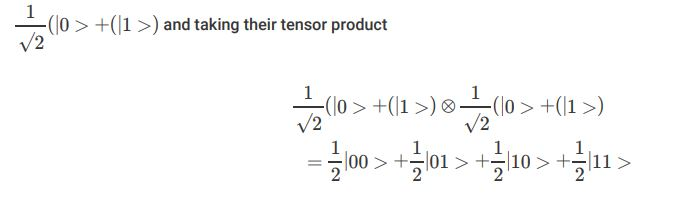

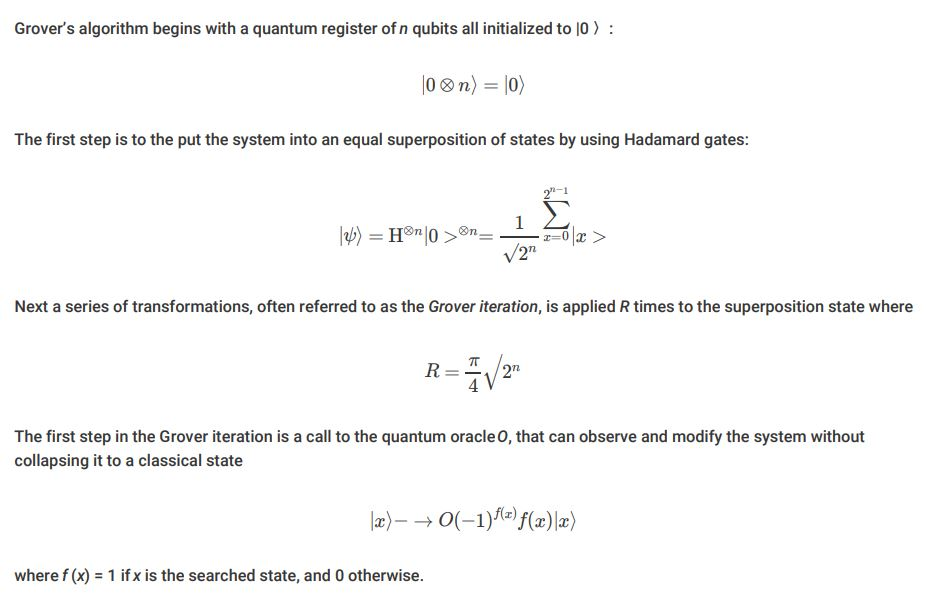

Then a selective phase inversion is performed which switches the sign of the amplitude of the searched state; for the
purposes of this illustration the searched state is the fourth state.
Finally, the inversion about average operation is performed, which increases the amplitude of the state that was inverted in
the previous step.

### Grover’s Search Algorithm ---  *Mathematical Analysis*

The algorithm begins with a quantum register of n qubits, where n is the number of qubits necessary to represent the search
space of size $2^{n}$ = N, all initialized to |0 >

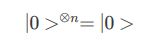

The next step is to put the system into an equal superposition of states; this is achieved by applying the Hadamard transform
H to the qubits. In a system of n qubits, n applications of the Hadamard transformation is needed to form a superposition of
each of the states individually

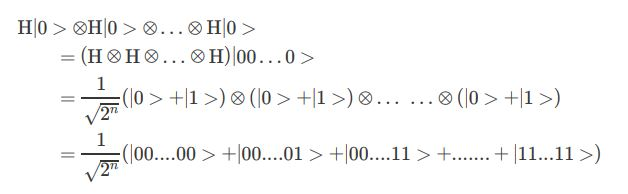

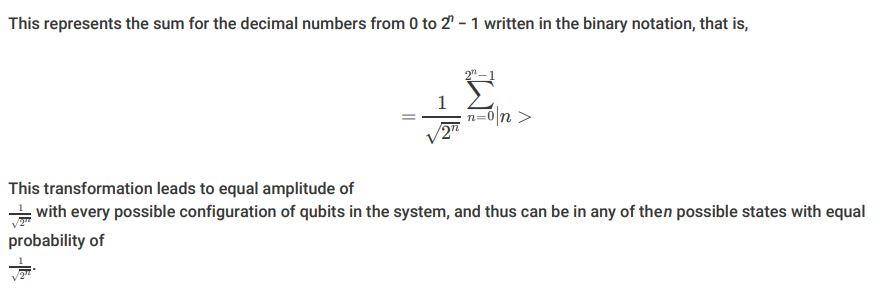

As stated earlier Grover’s algorithm requires an oracle that maps an input (0, 1) to (0, 1). The oracle may be considered as a
black box, that is, the details of how it works are not of concern. A gate corresponding to an oracle produces an 1-bit output for
an n-bit input. Since the oracle is not unitary nor reversible, it is not a valid quantum gate. One possible solution is to add an
extra bit c, called an ancilla, to use for the output. If f (x) = 0, the ancilla qubit is left unchanged; if howeverf (x) = 1, the phase
of the ancilla is inverted. The inclusion of an additional bit however can be avoided by flipping the input when f (x) = 1 as
shown in the gate below:

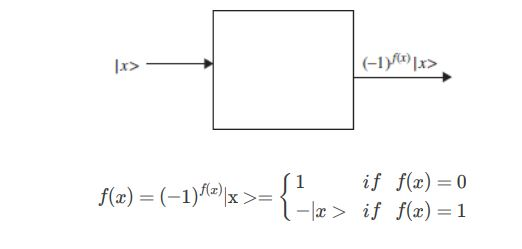

The uniform superposition state obtained by using Hadamard gates is then queried by the oracle gate that flips the amplitude
of the x* item and leaves everything else unchanged. The amplitude of x* is increased next by incorporating a new gate that
functions as what is called the Grover diffusion operator D as depicted below:

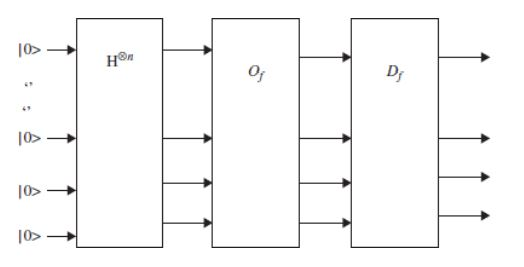

As an example of the Grover’s algorithm, consider a system consisting of N = 8 = 2 states . Suppose the state under
search, for example, x* is represented by the bit string 100.
The system can be represented by 3 qubits,N = 3. Assume that the superposition state |x > corresponding to three qubits is

x >= α0|000 > +α1
|001 > +α2
|010 > +… … … … …α7|111 >

where α is the amplitude of the state |i >. Each combination of the three qubits is the binary notation of numbers 0 to 7. These
are obtained by putting the three qubits into the superposition state

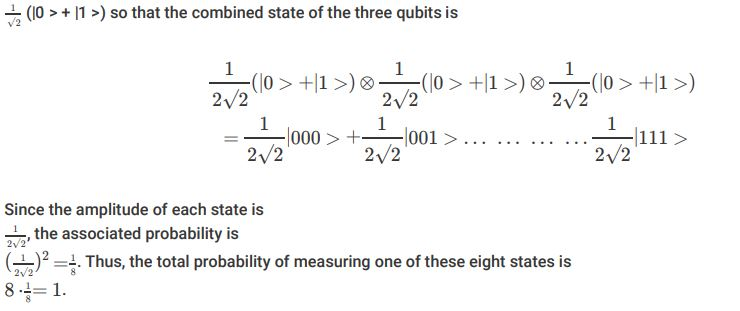

The amplitudes may be visualized as lines perpendicular to an axis as shown below; the length of a line is proportional to the
amplitude it represents. For example, the equal superposition of states resulting from the first Hadamard transformation appears as follows:

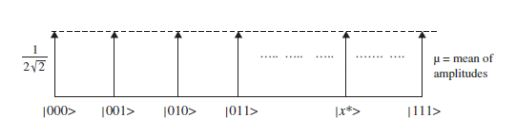


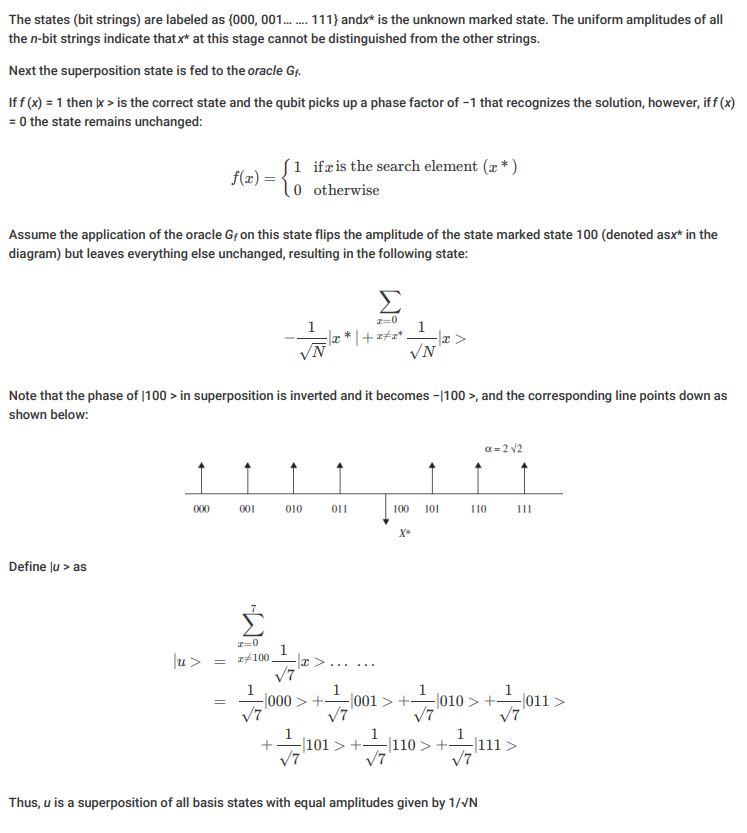


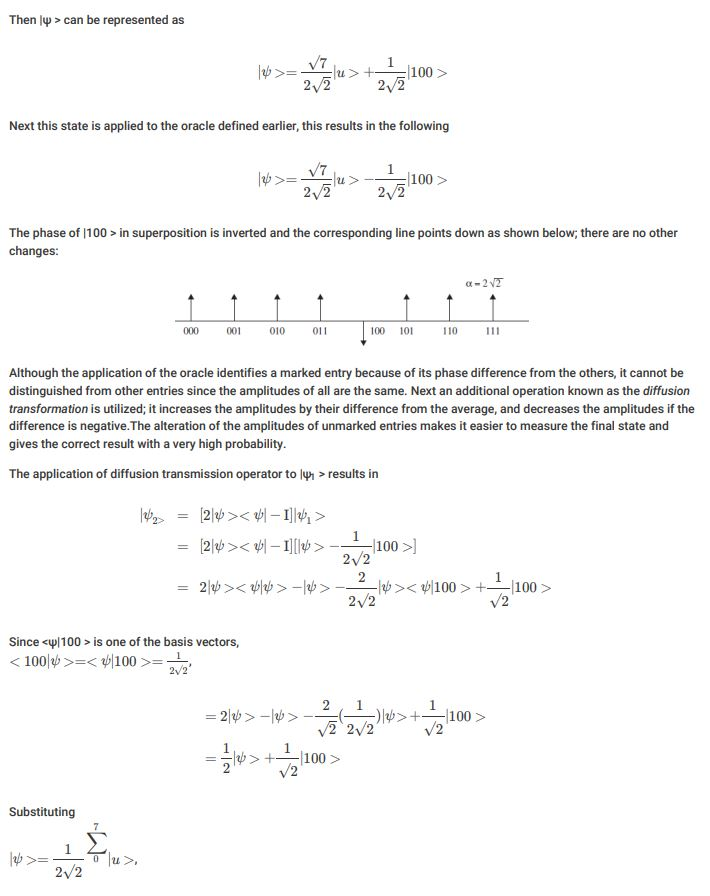


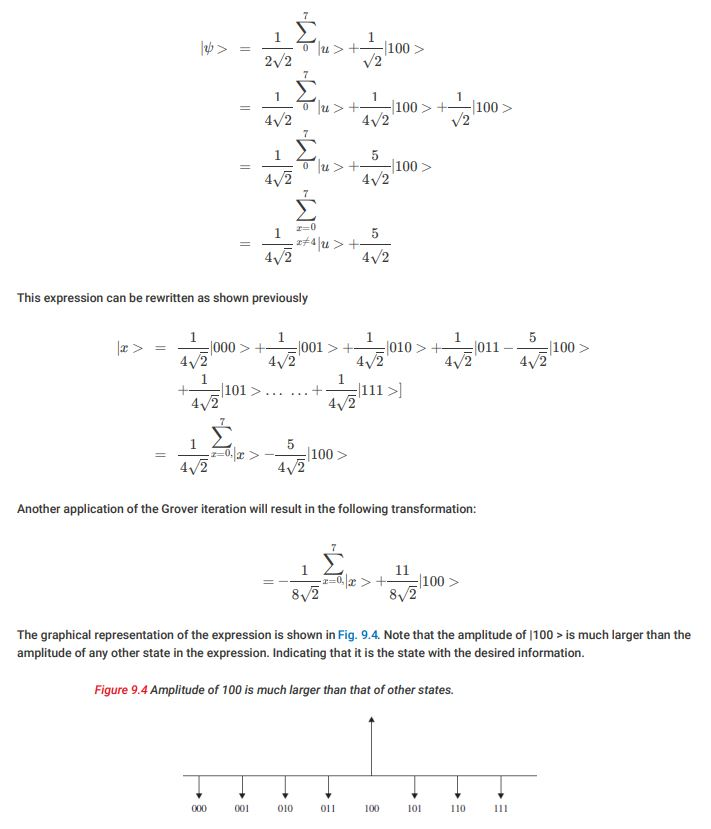

### Grover’s Search Algorithm --- *Implementation using Qiskit*

**Paper Reference :** The paper is developed by Giacomo Nannicini and Rudy Raymond, **Link :** https://arxiv.org/abs/1708.03684

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import *
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram

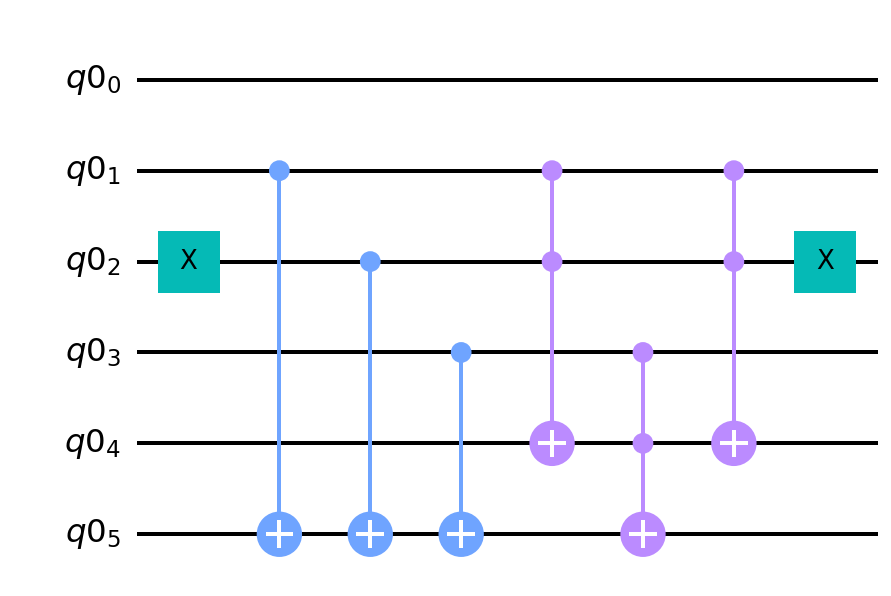

In [3]:
q = QuantumRegister(6)
qc = QuantumCircuit(q)
qc.x(q[2])
qc.cx(q[1], q[5])
qc.cx(q[2], q[5])
qc.cx(q[3], q[5])
qc.ccx(q[1], q[2], q[4])
qc.ccx(q[3], q[4], q[5])
qc.ccx(q[1], q[2], q[4])
qc.x(q[2])
qc.draw(output='mpl', scale = 2.0)

In [4]:
def black_box_u_f(circuit, f_in, f_out, aux, n, exactly_1_3_sat_formula):
    
    num_clauses = len(exactly_1_3_sat_formula)
    for (k, clause) in enumerate(exactly_1_3_sat_formula):
        # This loop ensures aux[k] is 1 if an odd number of literals
        # are true
        for literal in clause:
            if literal > 0:
                circuit.cx(f_in[literal-1], aux[k])
            else:
                circuit.x(f_in[-literal-1])
                circuit.cx(f_in[-literal-1], aux[k])
        # Flip aux[k] if all literals are true, using auxiliary qubit
        # (ancilla) aux[num_clauses]
        circuit.ccx(f_in[0], f_in[1], aux[num_clauses])
        circuit.ccx(f_in[2], aux[num_clauses], aux[k])
        # Flip back to reverse state of negative literals and ancilla
        circuit.ccx(f_in[0], f_in[1], aux[num_clauses])
        for literal in clause:
            if literal < 0:
                circuit.x(f_in[-literal-1])
    # The formula is satisfied if and only if all auxiliary qubits
    # except aux[num_clauses] are 1
    if (num_clauses == 1):
        circuit.cx(aux[0], f_out[0])
    elif (num_clauses == 2):
        circuit.ccx(aux[0], aux[1], f_out[0])
    elif (num_clauses == 3):
        circuit.ccx(aux[0], aux[1], aux[num_clauses])
        circuit.ccx(aux[2], aux[num_clauses], f_out[0])
        circuit.ccx(aux[0], aux[1], aux[num_clauses])
    else:
        raise ValueError('We only allow at most 3 clauses')
    # Flip back any auxiliary qubits to make sure state is consistent
    # for future executions of this routine; same loop as above.
    for (k, clause) in enumerate(exactly_1_3_sat_formula):
        for literal in clause:
            if literal > 0:
                circuit.cx(f_in[literal-1], aux[k])
            else:
                circuit.x(f_in[-literal-1])
                circuit.cx(f_in[-literal-1], aux[k])
        circuit.ccx(f_in[0], f_in[1], aux[num_clauses])
        circuit.ccx(f_in[2], aux[num_clauses], aux[k])
        circuit.ccx(f_in[0], f_in[1], aux[num_clauses])
        for literal in clause:
            if literal < 0:
                circuit.x(f_in[-literal-1])
# -- end function

## Inversion about the average

Another important procedure in Grover search is to have an operation that perfom the *inversion-about-the-average* step, namely, it performs the following transformation:

$$
\sum_{j=0}^{2^{n}-1} \alpha_j |j\rangle \rightarrow \sum_{j=0}^{2^{n}-1}\left(2 \left( \sum_{k=0}^{k=2^{n}-1} \frac{\alpha_k}{2^n} \right) - \alpha_j  \right) |j\rangle 
$$

The above transformation can be used to amplify the probability amplitude $\alpha_s$ when s is the solution and $\alpha_s$ is negative (and small), while $\alpha_j$ for $j \neq s$ is positive. Roughly speaking, the value of $\alpha_s$ increases by twice the average of the amplitudes, while others are reduced. The inversion-about-the-average can be realized with the sequence of unitary matrices as below:

$$
H^{\otimes n} \left(2|0\rangle \langle 0 | - I \right) H^{\otimes n}
$$

The first and last $H$ are just Hadamard gates applied to each qubit. The operation in the middle requires us to design a sub-circuit that flips the probability amplitude of the component of the quantum state corresponding to the all-zero binary string. The sub-circuit can be realized by the following function, which is a multi-qubit controlled-Z which flips the probability amplitude of the component of the quantum state corresponding to the all-one binary string. Applying X gates to all qubits before and after the function realizes the sub-circuit. 

In [5]:
def n_controlled_Z(circuit, controls, target):
    """Implement a Z gate with multiple controls"""
    if (len(controls) > 2):
        raise ValueError('The controlled Z with more than 2 ' +
                         'controls is not implemented')
    elif (len(controls) == 1):
        circuit.h(target)
        circuit.cx(controls[0], target)
        circuit.h(target)
    elif (len(controls) == 2):
        circuit.h(target)
        circuit.ccx(controls[0], controls[1], target)
        circuit.h(target)
# -- end function

Finally, the inversion-about-the-average circuit can be realized by the following function:

In [6]:
def inversion_about_average(circuit, f_in, n):
    """Apply inversion about the average step of Grover's algorithm."""
    # Hadamards everywhere
    for j in range(n):
        circuit.h(f_in[j])
    # D matrix: flips the sign of the state |000> only
    for j in range(n):
        circuit.x(f_in[j])
    n_controlled_Z(circuit, [f_in[j] for j in range(n-1)], f_in[n-1])
    for j in range(n):
        circuit.x(f_in[j])
    # Hadamards everywhere again
    for j in range(n):
        circuit.h(f_in[j])
# -- end function

Here is a circuit of the inversion about the average on three qubits.

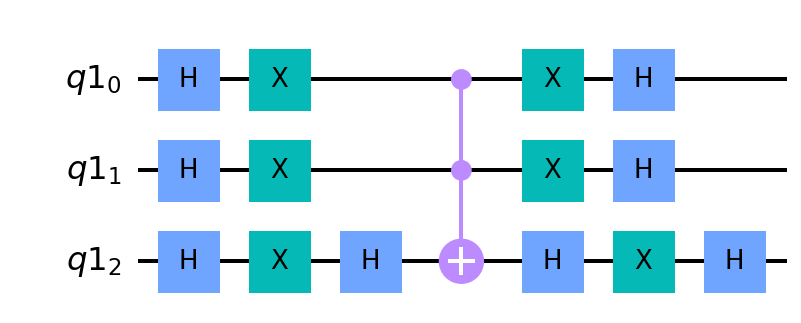

In [7]:
qr = QuantumRegister(3)
qInvAvg = QuantumCircuit(qr)
inversion_about_average(qInvAvg, qr, 3)
qInvAvg.draw(output='mpl', scale = 2.0)

## Grover Search: putting all together

The complete steps of Grover search is as follow.

1. Create the superposition of all possible solutions as the initial state (with working qubits initialized to zero)
$$  \sum_{j=0}^{2^{n}-1} \frac{1}{2^n} |j\rangle |0\rangle$$
2. Repeat for $T$ times:

    Apply the blackbox function
    
    Apply the inversion-about-the-average function
    
3. Measure to obtain the solution

The code for the above steps is as below:

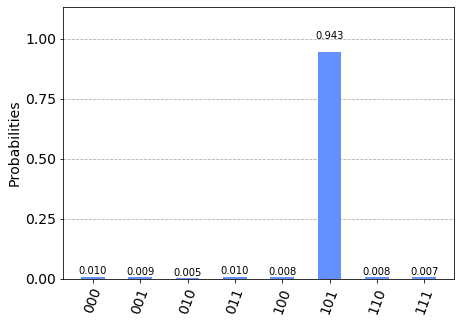

In [8]:
def input_state(circuit, f_in, f_out, n):
    """(n+1)-qubit input state for Grover search."""
    for j in range(n):
        circuit.h(f_in[j])
    circuit.x(f_out)
    circuit.h(f_out)
# -- end function

# Make a quantum program for the n-bit Grover search.
n = 3

# Exactly-1 3-SAT formula to be satisfied, in conjunctive
# normal form. We represent literals with integers, positive or
# negative, to indicate a Boolean variable or its negation.
exactly_1_3_sat_formula = [[1, 2, -3], [-1, -2, -3], [-1, 2, 3]]

# Define three quantum registers: 'f_in' is the search space (input
# to the function f), 'f_out' is bit used for the output of function
# f, aux are the auxiliary bits used by f to perform its
# computation.
f_in = QuantumRegister(n)
f_out = QuantumRegister(1)
aux = QuantumRegister(len(exactly_1_3_sat_formula) + 1)

# Define classical register for algorithm result
ans = ClassicalRegister(n)

# Define quantum circuit with above registers
grover = QuantumCircuit()
grover.add_register(f_in)
grover.add_register(f_out)
grover.add_register(aux)
grover.add_register(ans)

input_state(grover, f_in, f_out, n)
T = 2
for t in range(T):
    # Apply T full iterations
    black_box_u_f(grover, f_in, f_out, aux, n, exactly_1_3_sat_formula)
    inversion_about_average(grover, f_in, n)

# Measure the output register in the computational basis
for j in range(n):
    grover.measure(f_in[j], ans[j])

# Execute circuit
backend = BasicAer.get_backend('qasm_simulator')
job = execute([grover], backend=backend, shots=1000)
result = job.result()

# Get counts and plot histogram
counts = result.get_counts(grover)
plot_histogram(counts)

### ## Running the circuit in real devices

We have seen that the simulator can find the solution to the combinatorial problem. We would like to see what happens if we use the real quantum devices that have noise and imperfect gates.

However, due to the restriction on the length of strings that can be sent over the network to the real devices (there are more than sixty thousands charactes of QASM of the circuit), at the moment the above circuit cannot be run on real-device backends. We can see the compiled QASM on real-device ibmqx5 backend as follows.

In [9]:
from qiskit import IBMQ
IBMQ.save_account('b6795eb12a1473ce64475a7f38657bdaa797627142d9274e49368482dd1ed44cb2bb50d0b1a2721452a3b8689a5b4a3a9c99ea603b6b001a1bf7658846be5a9b',overwrite = True)

In [10]:
my_provider = IBMQ.load_account()
backend = my_provider.get_backend('ibmq_16_melbourne')
#djCompiled = transpile(djCircuit, backend = backend, optimization_level = 3)

grover_compiled = transpile(grover, backend=backend, seed_transpiler=1, optimization_level=3)

print('gates = ', grover_compiled.count_ops())
print('depth = ', grover_compiled.depth())

D:\Coding\Locker\pysoftwares\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


gates =  OrderedDict([('cx', 719), ('u2', 270), ('u1', 233), ('u3', 42), ('measure', 3), ('barrier', 1)])
depth =  804


The number of gates is in the order of thousands which is above the limits of decoherence time of the current near-term quantum computers. It is a challenge to design a quantum circuit for Grover search to solve large optimization problems.

In [11]:
grover.draw(output='mpl', scale = 7.0)

### Deutsch – Jozsa Algorithm --- *Introduction*

Deutsch’s algorithm works on a single input bit in the simple case wheref:(0, 1) → (0, 1). A generalization of the algorithm
known as Deutsch-Jozsa algorithm can act on an n-bit function f:(0, 1) → (0, 1). Assuming a 2-bit function of the form (0, 1)
→ (0, 1) is provided and it is known at the outset that the function is one of the four shown below, the problem is to identify
which one this is

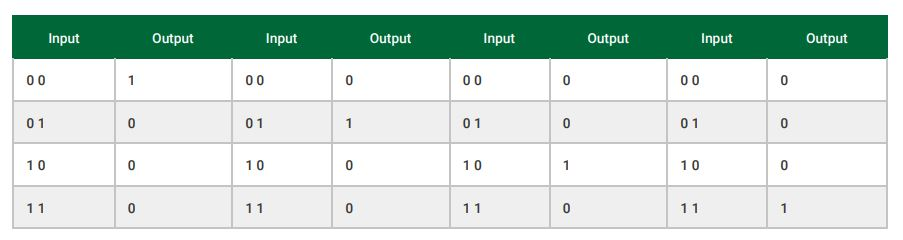
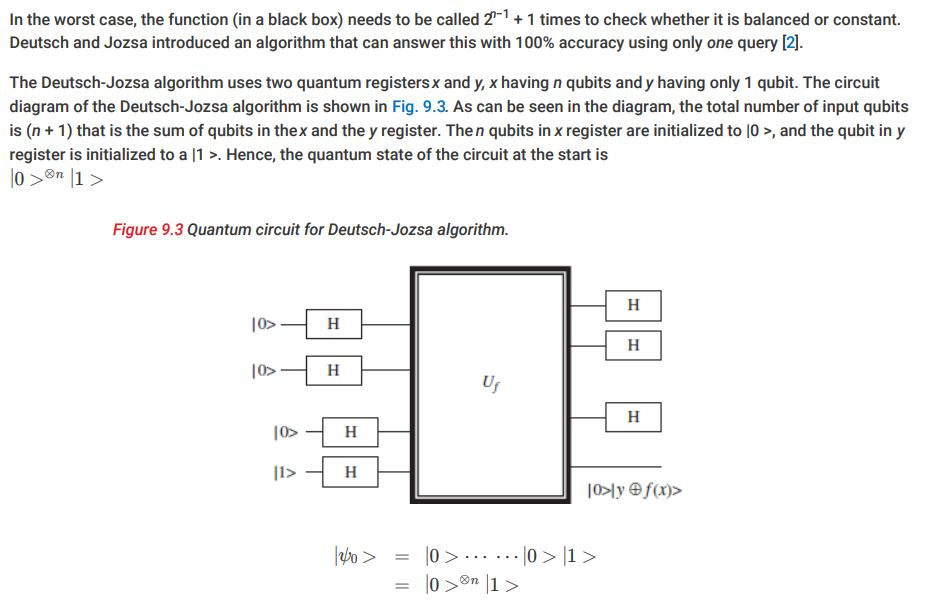

### Deutsch – Jozsa Algorithm --- *Mathematical Analysis*

 the Hadamard transformation H is applied separately to each qubit in the x and y register. This results in tensor products
of (n + 1) 1-qubit Hadamard gates (acting in parallel). For example, the Hadamard transformation of each qubit of a two-qubit
register assuming the register is initialized to |0> can be represented as

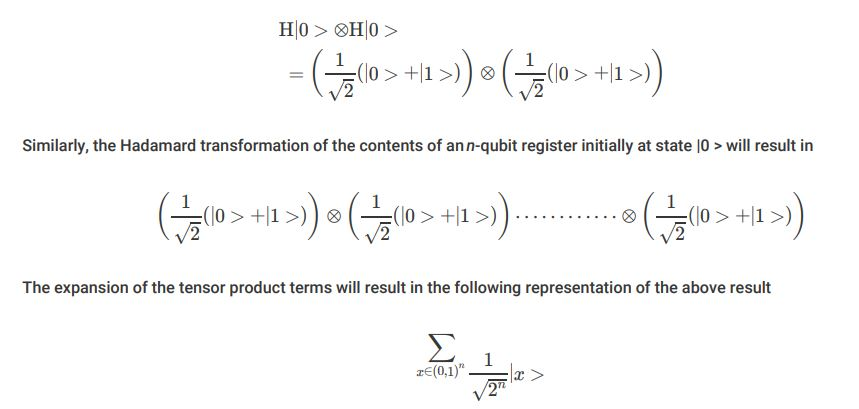

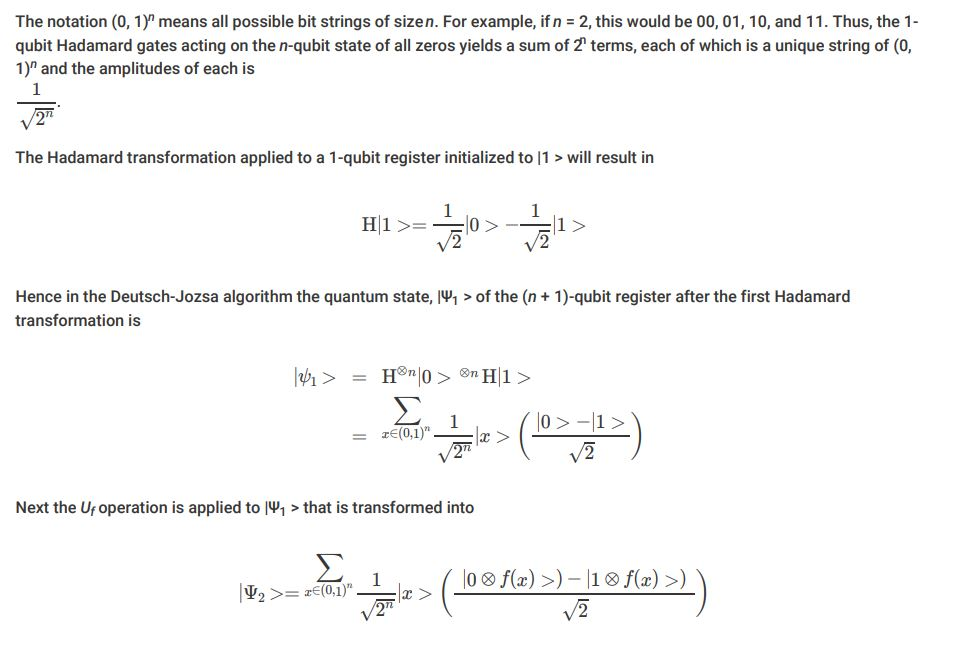

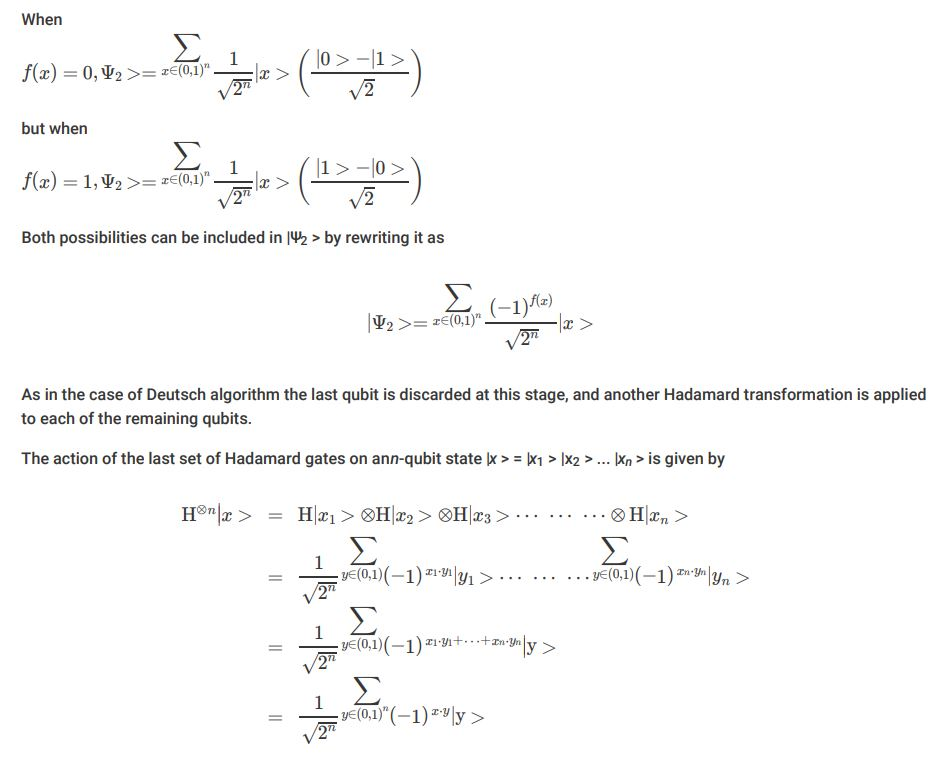

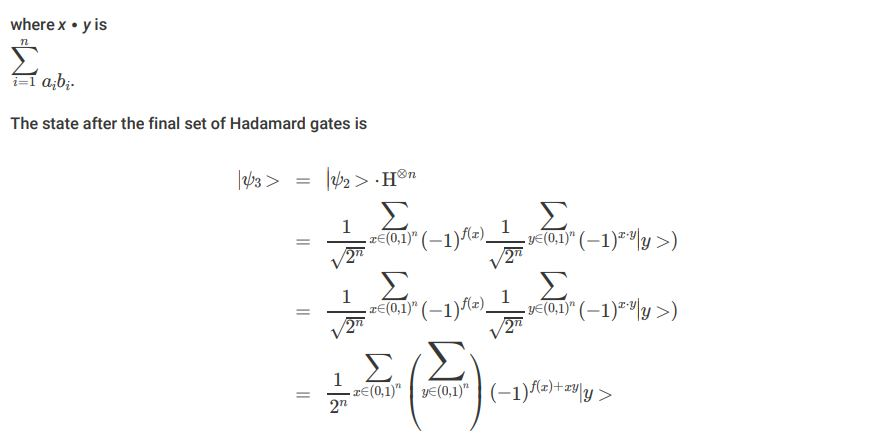

This implies that the function f (x) is constant if there is a unity probability of obtaining |00 ... 0> on measurement of then qubit
register, otherwise the function is balanced.


### Deutsch – Jozsa Algorithm  --- *Implementation using Qiskit*

**Paper Reference Link :** https://arxiv.org/pdf/quant-ph/9708016.pdf

**Algorithm in Brief**

The algorithm is quite simple as follows.
1. Prepare two quantum registers initialized to zero. The first is an $n$-qubit reqister for querying the oracle, and the second is a one-qubit register for storing the answer of the oracle
$$
|0\ldots 0\rangle |0\rangle
$$
2. Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
$$
H^{\otimes^n} |0\ldots 0\rangle |0\rangle = \frac{1}{\sqrt{2^n}}\sum_{i=0}^{2^n-1}|i\rangle |0\rangle 
$$
3. Flip the second register and apply the Hadamard gate. This is to store the answer of the oracle in the phase.
$$
\frac{1}{\sqrt{2^n}}\sum_{i=0}^{2^n-1}|i\rangle |0\rangle \rightarrow \frac{1}{\sqrt{2^{n+1}}}\sum_{i=0}^{2^n-1}|i\rangle ( |0\rangle - |1\rangle )
$$
4. Query the oracle
$$
\frac{1}{\sqrt{2^{n+1}}}\sum_{i=0}^{2^n-1}|i\rangle ( |0\rangle - |1\rangle ) \rightarrow \frac{1}{\sqrt{2^{n+1}}}\sum_{i=0}^{2^n-1}(-1)^{f(i)}|i\rangle ( |0\rangle - |1\rangle ) 
$$
5. Apply the Hadamard gate to the first register

6. Measure the first register. If it is non-zero, then conclude that the hidden Boolean function is balanced. Otherwise, conclude that it is constant. 

The correctness of the conclusion of the last step can be explained as follows. 

When the hidden Boolean function is constant, the quantum states before and after querying the oracle are the same. The inverse of the Hadamard gate is the Hadamard gate itself. Thus, by Step 5, we essentially reverse Step 2 to obtain the initial quantum state of all-zero at the first register.  

When the hidden Boolean function is balanced, the quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, by Step 5, when reverting the operation, we must end up with a quantum state that is orthogonal to the initial quantum state of all-zero at the first register. This means we should never obtain the all-zero state. 

**Preparing The Circuit**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.compiler import transpile
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

We first set the length of the  𝑛 -bit string.

In [13]:
n = 13

We then use Qiskit to program the algorithm.

In [14]:
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 


# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n + 1) #all qubits are initialized to zero

# for recording the measurement on the first register
cr = ClassicalRegister(n)

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.iden(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

The oracle returns a balanced function


**Experiment with Simulators**

We can run the above circuit on the simulator.

First, we draw the circuit.

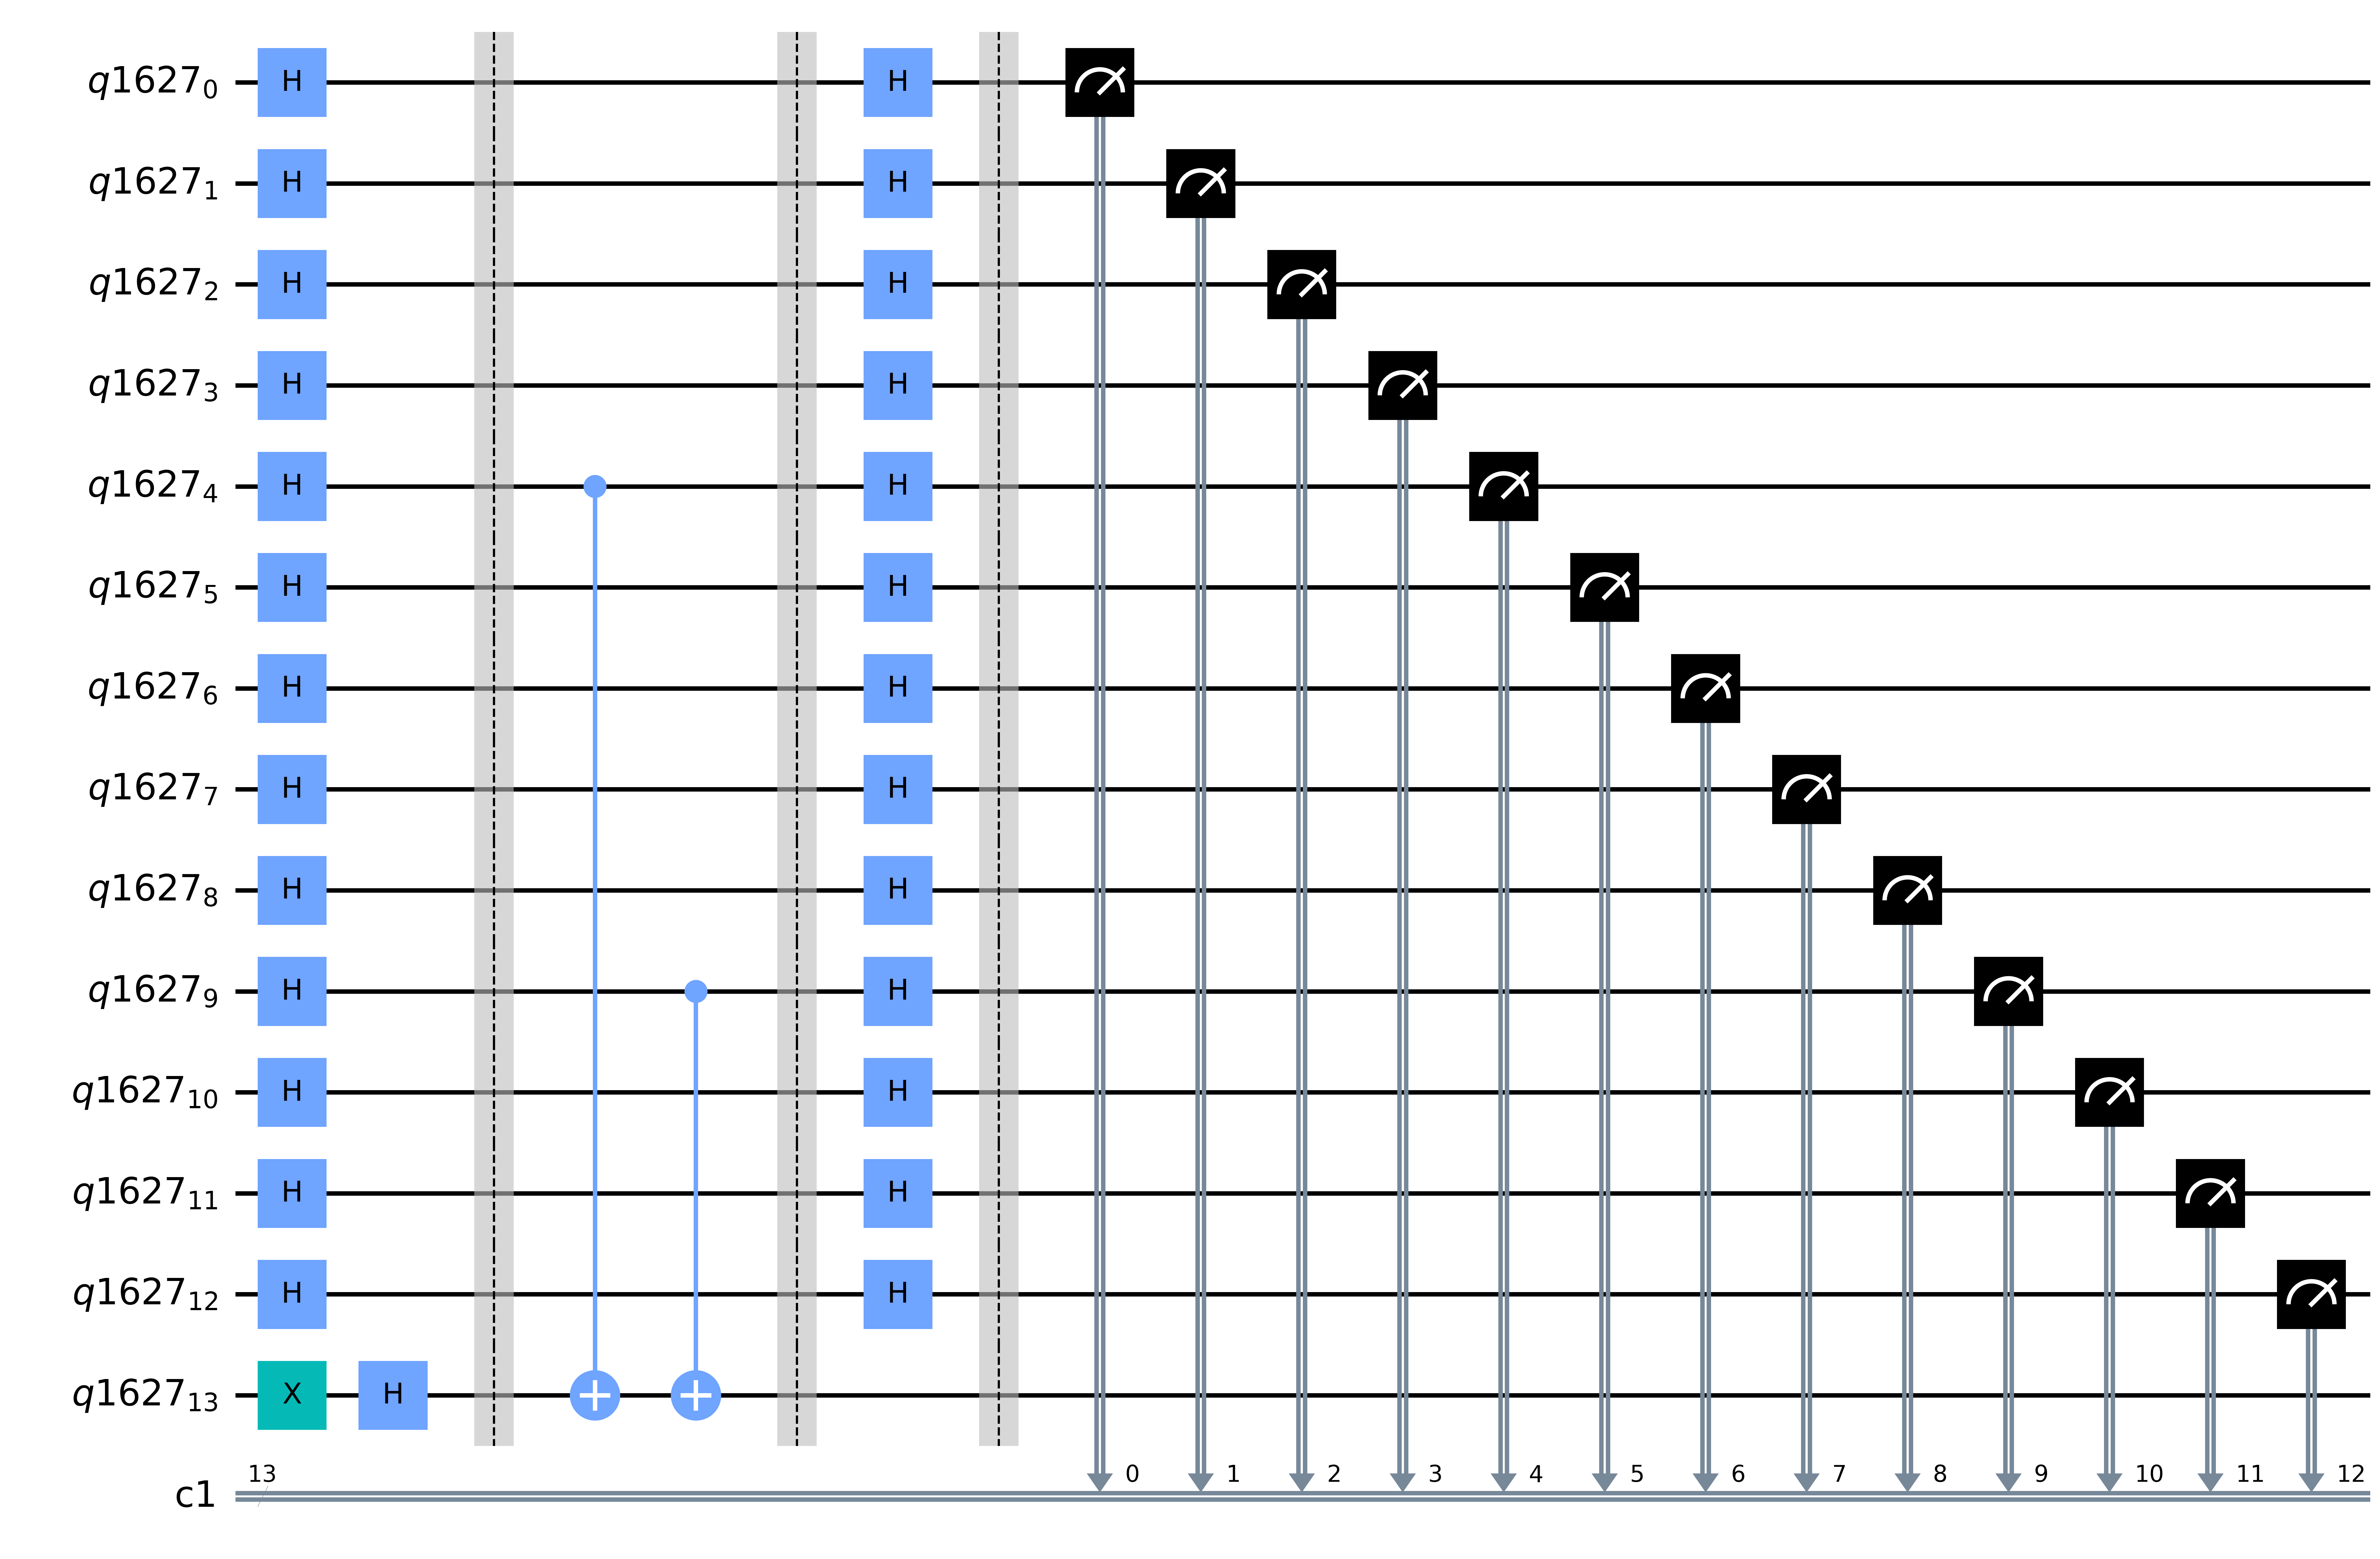

In [15]:
#draw the circuit
djCircuit.draw(output='mpl',scale = 8.0)

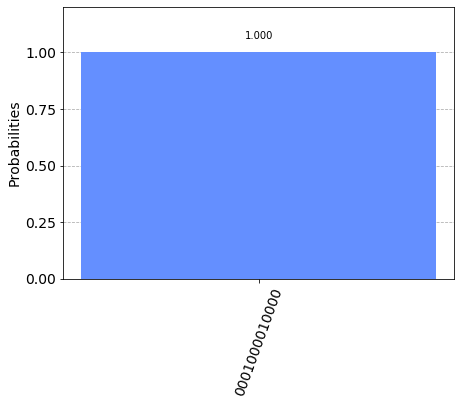

In [16]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1000
job = execute(djCircuit, backend=backend, shots=shots)
results = job.result() 
answer = results.get_counts()

plot_histogram(answer)

Repeating the above experiments, we can see that the result of the measurement is an all-zero bitstring if the oracle returns a constant value, or a non-zero bitstring otherwise.

### ## Experiment with Real Devices

We can run the circuit on the real device as below. However, notice that because the real devices are noisy, we cannot obtain the type of oracles with certainty, unlike when running the experiments with simulators. The Deutsch-Jozsa algorithm only shows the superiority of quantum computers against exact classical algorithms; when allowing some error, classically we can determine the type of the hidden Boolean function with a constant number of queries. This is asymptotically the same as the case with quantum computers.

In [38]:
from qiskit import IBMQ
IBMQ.save_account('50819b1ec495dc26087cef614eea5c1eee90b6a1b51672ae22b48fec515e262e105bd41fd85edaccaed19040dbe02031b01ca7973180c0d0d144d688928ca0b5',overwrite = True)

In [39]:
my_provider = IBMQ.load_account()
backend = my_provider.get_backend('ibmq_16_melbourne')
djCompiled = transpile(djCircuit, backend = backend, optimization_level = 1)

D:\Coding\Locker\pysoftwares\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-12-08 16:44:26,947: Credentials are already in use. The existing account in the session will be replaced.


In [40]:
djCompiled.draw(output='mpl',scale = 8.0)

In [41]:
job = execute(djCompiled, backend = backend, shots = 1024)
job_monitor(job)

Job Status: job has successfully run


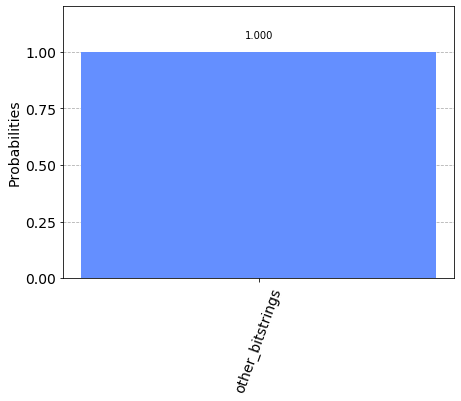

In [42]:
results = job.result()
answer = results.get_counts()

threshold = int(0.01 * shots) # the threshold of plotting significant measurements
filteredAnswer = {k: v for k,v in answer.items() if v >= threshold} # filter the answer for better view of plots

removedCounts = np.sum([ v for k,v in answer.items() if v < threshold ]) # number of counts removed 
filteredAnswer['other_bitstrings'] = removedCounts  # the removed counts are assigned to a new index

plot_histogram(filteredAnswer)

In [36]:
print(filteredAnswer)

{'other_bitstrings': 1024}


## Observations and Conclusions : 

* Brief Introduction of Quantum Algorithms has been proposed. 

* Thorough mathematical analysis is conducted on Grover’s Search Algorithm.

* Pseudocode of Grover’s Search Algorithm has been written, in the process got introduced to the concept of **Inversion about the average**.

* Grover’s Search Algorithm has been implemented using Qiskit library and results have been generated.

* Deutsch – Jozsa Algorithm is thoroughly studied and mathematical analysis of the same has been presented.

* Time Complexity analysis of Deutsch – Jozsa Algorithm has been done as well.

* Deutsch – Jozsa Algorithm is implemented using Qiskit library and the results are genereated. Same implementation has been scaled to a real world circuit.

* Learnt to read a research paper, understant it and implement the concepts proposed in the papers.

* Learnt to create job, schedule the job to run on a Live IBM Qunatum Machine.

* Learnt about the concept of API calling ~~ when a unique token is generated in our personal IBM account and we have to call the API using the token in our local environment for Running the circuit on real devices.

## References : 

**Research papers referred :**

* https://arxiv.org/abs/1708.03684

* https://arxiv.org/pdf/quant-ph/9708016.pdf

**Textbooks referred :**

* https://www.accessengineeringlibrary.com/content/book/9781260123111

## ----------------------------------------------- Thank You --------------------------------------------------